## Load the Data

Load the data from the file and remove the byte-codes

In [ ]:
from scipy.io import arff 
import pandas as pd

# Load arff file
data = arff.loadarff('/Project_Learning.arff')

# convert to pandas dataframe
df = pd.DataFrame(data[0])

# decode byte-string to string
df['allergy'] = df['allergy'].str.decode('utf-8') 
df['med'] = df['med'].str.decode('utf-8') 
df['disease'] = df['disease'].str.decode('utf-8') 
df['class'] = df['class'].str.decode('utf-8')

# print head of dataframe
df.head()


,age,surgery,docvisit,allergy,med,disease,bmi,class
0,20.0,0.0,2.0,no,no,cholesterol,28.0,low
1,21.0,0.0,4.0,no,no,no,23.0,low
2,22.0,0.0,3.0,no,no,no,23.0,low
3,23.0,0.0,3.0,no,no,no,23.0,low
4,24.0,0.0,3.0,no,no,no,21.0,low


## Data Prepocessing

converting all the strings to numbers

In [ ]:
from sklearn import preprocessing


le = preprocessing.LabelEncoder()
df.allergy = le.fit_transform(df.allergy)
df.med = le.fit_transform(df.med)
df.disease = le.fit_transform(df.disease)
df.rename(columns = {'class':'CLASS'}, inplace = True)
df.CLASS = le.fit_transform(df.CLASS)
df.head()

,age,surgery,docvisit,allergy,med,disease,bmi,CLASS
0,20.0,0.0,2.0,0,0,0,28.0,1
1,21.0,0.0,4.0,0,0,3,23.0,1
2,22.0,0.0,3.0,0,0,3,23.0,1
3,23.0,0.0,3.0,0,0,3,23.0,1
4,24.0,0.0,3.0,0,0,3,21.0,1


## Visualizing the Data

In this step we can visualize the data by cloring it by class and by comparing all features with each other.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


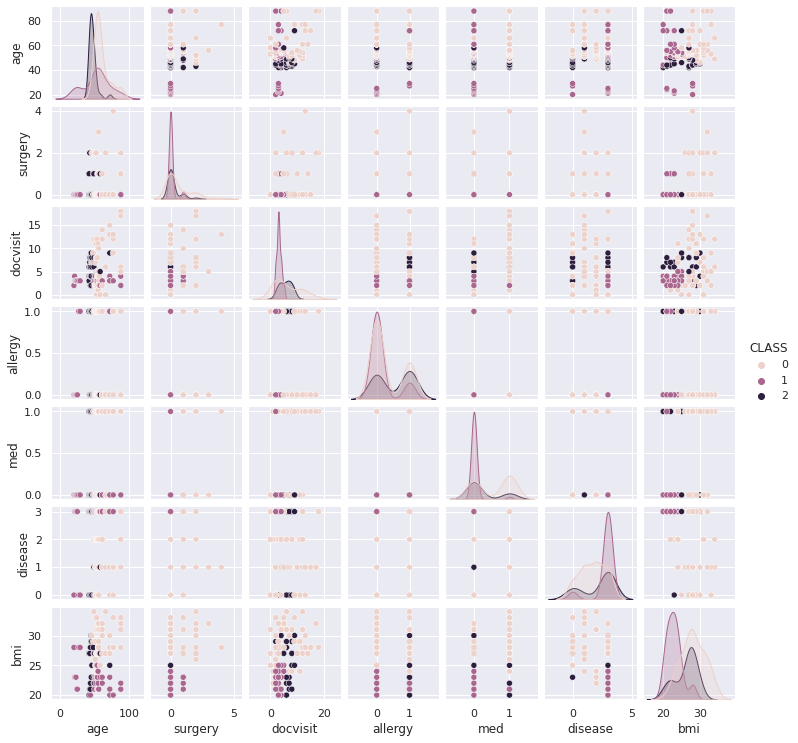

In [ ]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(df, hue='CLASS', size=1.5);

## Splitting feature matrix and target array

We want to exclude our target feature `class` from our feature matrix and put it into it's own target array.

In [ ]:
# X_data is our feature matrix without class
X_data = df.drop("CLASS", axis=1)

# Y_data is the target array only containing class
Y_data = df["CLASS"]

# Test
print(X_data.shape)
print(Y_data.shape)

(117, 7)
(117,)


## Training Set

Splitting Data into training-set and test-set

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_data, Y_data,
                                               random_state=1)

## Building the Model

Building a Gaussian Naive Bayes Classification.

In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

## Validation of the Model

Testing the model with our Test set and calculating and accuracy score.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9666666666666667

## Using the Model

Classifing patients from the test data.


In [ ]:
# prediction the class of every patient
# in the Xtest Dataframe
test_prediction = model.predict(Xtest)

print("predicted: [", end="")
for i in test_prediction:
  print(i, end=" ")

print("\b]\ncorrect:   [", end="")

for i in ytest:
  print(i, end =" ")

print("\b]")

predicted: [1 0 0 0 1 0 2 1 1 0 0 0 1 1 0 0 0 0 0 1 0 2 0 0 1 0 0 1 0 1 ]
correct:   [1 0 0 0 1 0 2 1 1 0 0 0 1 1 0 0 0 2 0 1 0 2 0 0 1 0 0 1 0 1 ]


## Alternative with Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(7, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(7, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


training = model.fit(Xtrain.values, ytrain.values, validation_split=0.1, epochs=200, batch_size=10, verbose=2)

model.summary()


Epoch 1/200
8/8 - 0s - loss: 13.5165 - accuracy: 0.2821 - val_loss: 10.2681 - val_accuracy: 0.3333
Epoch 2/200
8/8 - 0s - loss: 11.5375 - accuracy: 0.2821 - val_loss: 8.5834 - val_accuracy: 0.3333
Epoch 3/200
8/8 - 0s - loss: 9.7859 - accuracy: 0.2821 - val_loss: 6.8995 - val_accuracy: 0.3333
Epoch 4/200
8/8 - 0s - loss: 8.0784 - accuracy: 0.2821 - val_loss: 5.0581 - val_accuracy: 0.3333
Epoch 5/200
8/8 - 0s - loss: 6.5461 - accuracy: 0.3462 - val_loss: 3.4914 - val_accuracy: 0.4444
Epoch 6/200
8/8 - 0s - loss: 5.3945 - accuracy: 0.4103 - val_loss: 2.7337 - val_accuracy: 0.4444
Epoch 7/200
8/8 - 0s - loss: 4.8482 - accuracy: 0.4103 - val_loss: 2.4350 - val_accuracy: 0.6667
Epoch 8/200
8/8 - 0s - loss: 4.4135 - accuracy: 0.4872 - val_loss: 2.2719 - val_accuracy: 0.6667
Epoch 9/200
8/8 - 0s - loss: 4.0021 - accuracy: 0.5128 - val_loss: 2.1197 - val_accuracy: 0.6667
Epoch 10/200
8/8 - 0s - loss: 3.6632 - accuracy: 0.5128 - val_loss: 1.9380 - val_accuracy: 0.6667
Epoch 11/200
8/8 - 0s - lo

## Testing the accuracy

In [ ]:
accuracy = model.evaluate(Xtrain, ytrain)
print(accuracy)

3/3 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.6207
[0.6908749938011169, 0.6206896305084229]


In [ ]:
# Resultate mit tatsächlichen Werten vergleichen

print(model.predict_classes(Xtest))
print("[", end="")

for i in ytest:
  print(i, end =" ")

print("\b]")

[1 0 2 0 1 1 0 0 0 1 0 0 2 0 0 0 0 1 0 0 0 2 2 0 0 0 2 1 0 1]
[1 0 0 0 1 0 2 1 1 0 0 0 1 1 0 0 0 2 0 1 0 2 0 0 1 0 0 1 0 1 ]


## Plotting the results

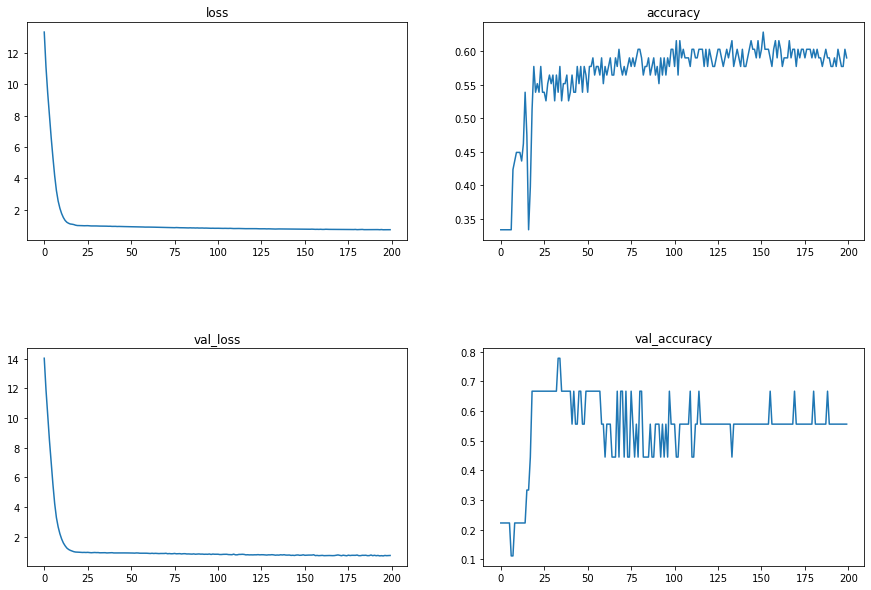

In [ ]:
from matplotlib import pyplot as plt

history = training


plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
plt.subplot(221) ; plt.title("loss")
plt.plot(history.history['loss'])
plt.subplot(222) ; plt.title("accuracy")
plt.plot(history.history['accuracy'])
plt.subplot(223) ; plt.title("val_loss")
plt.plot(history.history['val_loss'])
plt.subplot(224) ; plt.title("val_accuracy")
plt.plot(history.history['val_accuracy'])


plt.show()